# Examen Adelantado - Econometría
# TIPO 2

## 20 de Diciembre 2021

APELLIDOS, NOMBRE: GORLAT MUÑOZ, HÉCTOR

### El fichero con las respuestas y códigos debe enviarse a la tarea creada en PRADO para tal efecto.

La base de datos **peliculas.xlsx** cuenta con una muestra de datos sobre de 651 películas estrenadas entre 1970 y 2014, y fue creada para analizar los factores que influyen en la valoración de la audiencia sobre una película. La base de datos cuenta con las siguientes variables:
- _Valoracion_: Puntuación obtenida por la audiencia de la película.
- _Largometraje_: Toma el valor **1** si es un largometraje y **0** si es corto, documental, ...
- _Drama_: **1** si es un drama y **0** si no.
- _Comedia_: **1** si es comedia y **0** si no.
-  _Duracion_: en minutos de la pelicula
- _Estreno_a_: año de estreno de la pelicula.
- _Estreno_m_: mes de estreno de la película.
- _Puntos_Critica_: valoración de los críticos en visionado previo a estreno.
- _Nominacion_MejorPelicula_: si la película fue nominada a mejor película en los Oscars.
- _Premio_MejorActor_: si el actor principal  fue premiado con Óscar a mejor actor.
- _Premio_MejorActriz_: si la actriz principal fue premiada con Óscar a mejor actriz.
- _Premio_MejorPelicula_: si la película fue premiada como mejor película en los Oscars.
- _Premio_MejorDirector_: si la película fue premiada a mejor película en los Oscars.
- _SigloXXI_: **1** si la película se estrenó en el siglo XXI y **0** si se estrenó en el siglo XX.
- _ID_: título de la película evaluada.

Los datos están disponibles en el fichero **peliculas.xlsx**.

### Ejercicio 1
Especifica un modelo de regresión lineal para explicar las valoraciones de las películas en base a $4$ de las variables disponibles (excepto _PremioMejorDirector_). Estima el modelo especificado e interpreta los coeficientes estiados obtenidos.

In [5]:
##Código:
import pandas as pd
import statsmodels.api as sm #para mco

datos = pd.read_excel('peliculas.xlsx')
#print(datos)

y=datos['Valoracion']
X=datos[['Puntos_Critica','Drama','Comedia','Duracion']]

mco = sm.OLS(y,sm.add_constant(X)).fit()
mco.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Valoracion   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          1.19e-130
Time:                        08:50:33   Log-Likelihood:                -669.37
No. Observations:                 651   AIC:                             1349.
Df Residuals:                     646   BIC:                             1371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1739      0.157     26.634      0.000       3.866       4.482
Puntos_Critica     0.0277      0.001     28.426      0.000       0.026       0.030
Drama             -0.0339      0.059     -0.578      0.563      -0.149       0.081
Comedia           -0.2712      0.086     -3.154      0.002      -0.440      -0.102
Duracion           0.0073      0.001      5.111      0.000       0.005       0.010
==============================================================================
Omnibus:                       51.451   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.317
Skew:                          -0.549   Prob(JB):                     2.98e-19
Kurtosis:                       4.392   Cond. No.                         734.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respuesta:
Con este modelo he querido explicar la valoración de las películas(variable endógena), en función de cuatro variables exógenas, tal y como nos dice el enunciado. Las variables escogidas son: Los puntos de crítica, Drama, Comedia y la duración.
Según los resultados obtenidos de la regresión lineal, he obtenido un modelo globalmente significativo, ya que el valor      Prob(F-statitic) es inferior a 0.05, y además, he obtenido un ajuste aceptable, ya que el valor R^2 es mayor que 0.5.

En cuanto a las variables exógenas, todas ellas menos Drama, han resultado significativas para nuestro modelo, con valores de P_valor inferiores a 0.05. Por tanto, podemos interpretar que tanto los puntos de crítica como la duración de la película, afectan positivamente a la valoración, con coeficientes de 0.0277 y 0.0073. En cambio, que la película sea del género comedia perjudica a la valoración, con un coeficiente de -0.2712.




### Ejercicio 2

Justifica que supone la significación global e individual del modelo. Indica los resultados de estos tests en el modelo obtenido tanto a un nivel de significación del 5% como del 10%. ¿Se obtienen conclusiones coherentes de estos?

In [ ]:
##Código:



Respuesta: 
La significación global e individual del modelo indica que este esta correctamente definido y que además, nuestras variables explican el comportamiento de la variable endógena.

Como ya he explicado en el ejercicio 1, la significación global del modelo podemos comprobarla con el valor Prob(f-statistic)
que efectivamente es menor que 0.05, y la significación individual se cumple con las variables donde su p_valor es menor que 0.05, que en nuestro modelo podemos ver que son todas menos la variable Drama. Esto explicado sería para una significación del 5%, donde nuestro modelo es muy significativo. Con una significación del 10%, se podrían empezar a hacer estimaciones, pero sin tanta exactitud.



### Ejercicio 3

Aplica algún test de hipótesis que te permita contrastar si existen diferencias entre el comportamiento de las valoraciones en base a las variables escogidas entre aquellas películas nominadas a los Óscars y las que no. Explica el test que has aplicado e interpreta los resultados obtenidos.

In [10]:
##Código:
# Voy a realizar el test de Chow para ver si existen diferencias entre estar nominado o no.
datos = pd.read_excel('peliculas.xlsx')
#print(datos)
SCR=mco.ssr  #SCR del total de los datos

datos_oscar=datos[datos["Nominacion_MejorPelicula"]==1]  #modelo para películas nominadas a oscar
Y_oscar=datos_oscar["Valoracion"]
X_oscar=datos_oscar[["Puntos_Critica", "Drama", "Comedia","Duracion"]]
mco_oscar=sm.OLS(Y_oscar, sm.add_constant(X_oscar)).fit()
SCRoscar=mco_oscar.ssr


datos_Noscar=datos[datos["Nominacion_MejorPelicula"]==0]  #modelo para películas no nominadas a oscar
Y_Noscar=datos_Noscar["Valoracion"]
X_Noscar=datos_Noscar[["Puntos_Critica", "Drama", "Comedia","Duracion"]]
mco_Noscar=sm.OLS(Y_Noscar, sm.add_constant(X_Noscar)).fit()
SCRNoscar=mco_Noscar.ssr



n=len(datos)
k=4 #numero variables

Fexp=(n-2*k-2)/(k+1) * (SCR - (SCRoscar+SCRNoscar))/(SCRoscar+SCRNoscar)
Fexp

from scipy import stats
Fteo= stats.f.ppf(1-0.05, k+1, n-2*k-1)

print(Fexp, Fteo) #se rechaza que oscar y Noscar son iguales si Fexp>Fteo
#print(datos)


0.9227255274327784 2.2280609714381163


Respuesta: 
Para contrastar si existen diferencias entre el comportamiento de las valoraciones en base a nuestras variables exógenas según estén nominadas o no a un oscar, he utilizado el test de Chow. Este test, exige la suma de los cuadrados de los residuos (SCR) global del modelo, y de los modelos independientes según tengan oscar o no, con estos valores podemos obtener los estadísticos Fexp y Fteo, con los que podemos resolver la hipótesis. 

En este caso, se cumple la hipótesis que afirma que oscar y Noscar son iguales, ya que Fexp<Fteo.




### Ejercicio 4

Analiza si los datos presentan un problema de multicolinealidad con las medidas de detección que conozcas, y en caso de existir este problema, explica cómo puedes paliar el problema en el modelo.

In [15]:
##Código:
mco.condition_number

import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # factor de inflación de la varianza
vifs


[5.2088556192142095, 2.2661417914307087, 1.2951985081894157, 6.698257038812623]

Respuesta: 
Para estudiar si existe un problema de multicolinealidad, he utilizado dos métodos, el número de condición y el factor de inflación de la varianza. 
En el primer caso, el número resultado es muy superior a 30, indicando que la multicolinealidad puede ser preocupante.
En cambio, cuando estudiamos el factor de inflación, podemos observar que todos los valores son inferiores a 10, afirmando que no existen problemas de multicolinealidad.

El valor del número de condición podría corregirse centrando las variables, ya que el problema podría ser de multicolinealidad aproximada no esencial(relación de las variables exógenas con la constante)




### Ejercicio 5

Extrae los residuos de tu modelo y chequea si estos siguen una distribución normal gráficamente y con algún test de hipótesis ¿Que consecuencias tendría en tu modelo que no se cumpliera esta hipótesis? Justifica detalladamente la respuesta.

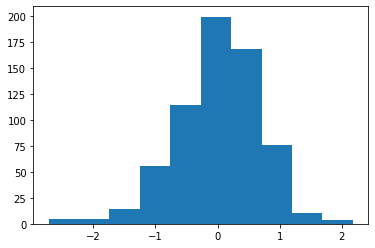

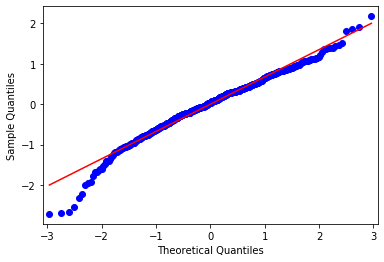

In [20]:
##Código:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco.resid)
pyplot.show()
qqplot(mco.resid, line='s')
pyplot.show()



Respuesta:
Como podemos observar en los gráficos, claramente los residuos de nuestro modelo siguen una distribución normal. Si no se cumpliese esta hipótesis, con nuestro modelo no podríamos realizar la inferencia sobre los parámetros de nuestro modelo, es estrictamente necesario que nuestros residuos sigan una distribución normal de media 0 y varianza constante.



### Ejercicio 6

¿En qué consiste el test de Glejser y qué permite detectar? Aplícalo a tus datos con alguna de las variables que sospeches que podría suponer un problema y comenta los resultados obtenidos.

In [36]:
##Código:
z = X['Duracion']
#print(z)
for h in [1,2,3,4,5,6]:
    mcoaux = sm.OLS(abs(mco.resid), sm.add_constant(z**h)).fit()
    pval = mcoaux.pvalues[1]
    print('h:',h,'-> pvalt:',pval,';R2:',mcoaux.rsquared)

h: 1 -> pvalt: 0.008104883493182613 ;R2: 0.01075156720790238
h: 2 -> pvalt: 0.02784369031719312 ;R2: 0.007432099251322044
h: 3 -> pvalt: 0.14828622973589944 ;R2: 0.003217313306533187
h: 4 -> pvalt: 0.5550659247357157 ;R2: 0.0005369713627882966
h: 5 -> pvalt: 0.9013233002389909 ;R2: 2.3705936219142743e-05
h: 6 -> pvalt: 0.5424864785323931 ;R2: 0.0005718497473691242


Respuesta:
El test de Glejser consite en analizar individualmente durante un intervalo de h(parámetro que contiene este test, que se eleva a las variables) las variables de nuestro modelo para saber donde está nuestro problema de heteroscedasticidad.
Como resultado de este test, obtendríamos el valor h=1, ya que es el valor p_valor significativo con R^2 mayor. Este problema podríamos arreglarlo mediante mínimos cuadrados ponderados.




### Ejercicio 7

Explica en qué consiste el problema de Autocorrelación. Justifica si existe este problema en tu modelo, y en caso afirmativo, aplica alguna técnica para su corrección.

In [18]:
##Código:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(mco.resid)  #para realizar el test
dw



2.0704542275737614

Respuesta:
La Autocorrelación es un problema de especificación del modelo que puede significar que existen ciclos y tendencias, relaciones no lineales en el modelo y relaciones dinámicas.
Para conocer si tenemos o no un problema de este tipo, podemos utilizar el coeficiente de Durbin-Watson. Como este valor nos sale aproximadamente 2, no tenemos problemas de autocorrelación. No tenemos que corregir nada.


